# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0','ccbar0']
filenames1 = ['ccbar_new00','bbbar_new00','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames1 = ['ccbar_hits0','bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 1#25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float32')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    
    data.loc[data['sdphi2'] < -9, 'IsTrue3'] = 1
    data.loc[data['sdphi3'] < -9, 'IsTrue3'] = 1
    data['IsTrue0'] = data['IsTrue0']*data['IsTrue1'] * data['IsTrue2']*data['IsTrue3']
    data.loc[data['IsTrue0'] > 0, 'IsTrue0'] = 1


    data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore']
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['Ecore3'] = data['Ecore2']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconpt3'] = data['reconpt2']/data['Pt']
    #data['Alpha'] = data['Alpha']*data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']
    #data['sdphi2'] = data['sdphi2'] + 10
    #data['sdphi3'] = data['sdphi3'] + 10
    #data.loc[data['sdphi2'] > 0, 'sdphi2'] = 1
    #data.loc[data['sdphi3'] > 0, 'sdphi3'] = 1
    #data['sdphi3'] = data['sdphi3']*data['sdphi2']

In [4]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
1623833        3  1.080237  0.128081  1.028710  0.324463  52.681999 -0.101746   
514046         4  0.487046  2.206107  1.029936  2.650391  52.062771 -0.224609   
5046837        1  0.952890  2.199116  1.001123  2.412109 -10.467805 -0.107117   
305157         1  0.769778 -0.162442  1.003831 -0.427734  19.137770  0.133301   
5186498        3  1.571422  2.965431  1.030937  2.832031  55.181171  0.068115   

            Ecore  Centrality  Charge  ...     sdthe3  IsTrue3  \
1623833 -0.215203          56       1  ...   0.189337        1   
514046   0.366505           3       1  ...  -0.197871        1   
5046837 -0.345604          76       1  ... -10.000000        1   
305157  -0.235418          19      -1  ... -10.000000        1   
5186498 -0.057372           6      -1  ...  -0.257401        1   

         SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  \
1623833      -33.707237      -99.000000       -6.009311      -99.000000   
514046         0.000000       11.878684        7.279948        9.601653   
5046837      -99.000000      -99.000000      -99.000000      -99.000000   
305157       -99.000000       22.430544      -99.000000        1.329387   
5186498        0.352755       20.196545       16.156212        2.114454   

         SecondHitPhiR31  SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  
1623833       -99.000000       -99.000000       -99.000000        -99.00000  
514046         -8.128763       -99.000000         5.137471        -99.00000  
5046837       -99.000000       -99.000000       -99.000000        -99.00000  
305157        -99.000000       -99.000000       -99.000000        -99.00000  
5186498       -12.477768        49.071102       -11.065300          0.99691  

[5 rows x 64 columns]

In [5]:
print(data.size, data.shape)

790327552 (12348868, 64)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns=  ['sdphi0','SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
data = data.drop(columns=  ['sdphi1','SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
data = data.drop(columns=  ['sdphi2','SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
data = data.drop(columns=  ['sdphi3','SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
data = data.drop(columns=  ['NBDThit','reconphi0','Alpha','Charge', 'Arm'])

In [7]:
data.head()

Pt     Ecore  Centrality   reconpt    sdthe0  IsTrue0  \
1623833  1.080237 -0.215203          56 -0.252050  0.850973        1   
514046   0.487046  0.366505           3 -0.096632 -1.276549        1   
5046837  0.952890 -0.345604          76 -0.254076 -1.290594        1   
305157   0.769778 -0.235418          19 -0.296142 -0.138857        1   
5186498  1.571422 -0.057372           6 -0.213262 -0.514094        1   

         SecondHitPhiR0  SecondHitTheR0  SecondHitPhiR01  SecondHitTheR01  \
1623833      -99.000000      -99.000000       -99.000000       -99.000000   
514046        -5.414782       -2.342596        -9.623226       -10.845152   
5046837      -99.000000      -99.000000       -99.000000       -99.000000   
305157        -6.783414       12.091972       -99.000000       -99.000000   
5186498       11.552727        8.936131        27.926479       -18.621666   

         ...     sdthe2  SecondHitPhiR2  SecondHitTheR2  SecondHitPhiR21  \
1623833  ...  -1.046221      -26.103443       -6.842471       -99.000000   
514046   ... -10.000000      -99.000000      -99.000000       -99.000000   
5046837  ...  -0.817559        0.000000        7.803396       -99.000000   
305157   ...  -0.563263      -18.373102       -5.894152        39.787186   
5186498  ...   0.021890        3.142621       11.361748         7.858397   

         SecondHitTheR21     sdthe3  SecondHitPhiR3  SecondHitTheR3  \
1623833       -99.000000   0.189337      -33.707237       -6.009311   
514046        -99.000000  -0.197871        0.000000        7.279948   
5046837       -99.000000 -10.000000      -99.000000      -99.000000   
305157         -0.044878 -10.000000      -99.000000      -99.000000   
5186498       -11.633934  -0.257401        0.352755       16.156212   

         SecondHitPhiR31  SecondHitTheR31  
1623833       -99.000000       -99.000000  
514046         -8.128763         5.137471  
5046837       -99.000000       -99.000000  
305157        -99.000000       -99.000000  
5186498       -12.477768       -11.065300  

[5 rows x 25 columns]

In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'reconpt', 'Ecore1', 'Ecore2', 'Ecore3', 'reconpt1', 'reconpt2', 'reconpt3']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


In [9]:
#analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/4*3 + 1)

    print(cut_off_val,cut_off_test)

    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [11]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

6174434 9261652


In [12]:
X_test

Pt     Ecore  Centrality   reconpt    sdthe0  SecondHitPhiR0  \
696892   1.108875 -0.001748          58  0.006985  0.477218      -99.000000   
508429   0.880367  0.157879          47  0.085244  0.226589      -17.979631   
394358   0.705862 -1.119032          16 -0.774334  3.852269      -16.214306   
91701    0.622872 -0.186910          51 -0.169131  0.181741      -99.000000   
239098   1.607318 -0.035403          68  0.016019  0.630400      -99.000000   
...           ...       ...         ...       ...       ...             ...   
1198430  0.620681 -0.206734          54 -0.151245  0.185593      -99.000000   
1878336  0.948005 -0.439825          44 -0.333940 -1.721687      -99.000000   
4647948  1.413642 -0.675287          92 -0.542305  0.128755      -99.000000   
4407689  0.712458  0.171231          26  0.048418 -0.146698       12.654123   
2853270  0.819804  0.063332          61  0.060562 -0.777142      -99.000000   

         SecondHitTheR0  SecondHitPhiR01  SecondHitTheR01    sdthe1  ...  \
696892       -99.000000       -99.000000       -99.000000 -0.200469  ...   
508429         2.733469       -99.000000       -99.000000  0.056559  ...   
394358        -0.154316       -35.744713         5.524771 -0.294239  ...   
91701        -99.000000       -99.000000       -99.000000 -0.538640  ...   
239098       -99.000000       -99.000000       -99.000000  1.613397  ...   
...                 ...              ...              ...       ...  ...   
1198430      -99.000000       -99.000000       -99.000000 -0.381177  ...   
1878336      -99.000000       -99.000000       -99.000000 -2.166016  ...   
4647948      -99.000000       -99.000000       -99.000000  0.916780  ...   
4407689      -13.272090       -99.000000       -99.000000  0.261703  ...   
2853270      -99.000000       -99.000000       -99.000000  0.662824  ...   

            sdthe2  SecondHitPhiR2  SecondHitTheR2  SecondHitPhiR21  \
696892    1.426592      -99.000000      -99.000000       -99.000000   
508429   -0.379944      -26.351419       11.184787        55.629799   
394358    1.216893        0.000000       -5.894087         0.000000   
91701     1.056286        0.707491       -2.824336       -99.000000   
239098  -10.000000      -99.000000      -99.000000       -99.000000   
...            ...             ...             ...              ...   
1198430 -10.000000      -99.000000      -99.000000       -99.000000   
1878336  -0.853361       15.428978       -8.430344        20.479204   
4647948  -1.850393      -99.000000      -99.000000       -99.000000   
4407689  -0.373501      -99.000000      -99.000000       -99.000000   
2853270   0.959739      -99.000000      -99.000000       -99.000000   

         SecondHitTheR21     sdthe3  SecondHitPhiR3  SecondHitTheR3  \
696892        -99.000000 -10.000000      -99.000000      -99.000000   
508429          5.226982  -1.264250       11.841302      -12.659590   
394358          8.418826 -10.000000      -99.000000      -99.000000   
91701         -99.000000 -10.000000      -99.000000      -99.000000   
239098        -99.000000   1.169992      -18.525322      -17.970825   
...                  ...        ...             ...             ...   
1198430       -99.000000   0.916166       -0.000000      -15.335965   
1878336        -1.051506   0.335943      -99.000000      -99.000000   
4647948       -99.000000 -10.000000      -99.000000      -99.000000   
4407689       -99.000000   0.843520        0.524169        2.067891   
2853270       -99.000000 -10.000000      -99.000000      -99.000000   

         SecondHitPhiR31  SecondHitTheR31  
696892        -99.000000       -99.000000  
508429        -29.450142        12.300776  
394358        -99.000000       -99.000000  
91701         -99.000000       -99.000000  
239098        -99.000000       -99.000000  
...                  ...              ...  
1198430       -99.000000       -99.000000  
1878336       -99.000000       -99.000000  
4647948       -99.000000       -99.000000  
4407689

In [13]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.00      0.00     99862
           1       0.97      1.00      0.98   2987354

    accuracy                           0.97   3087216
   macro avg       0.87      0.50      0.49   3087216
weighted avg       0.96      0.97      0.95   3087216

confusion matrix
[[     71   99791]
 [     20 2987334]]


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[24],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[24]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.9724165720830678
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 24}
0.9722518696561965
time of execution (sec) 1383.9674677848816


# Cross Validation

In [16]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50     99862
           1       0.98      0.99      0.99   2987354

    accuracy                           0.97   3087216
   macro avg       0.79      0.71      0.74   3087216
weighted avg       0.97      0.97      0.97   3087216



In [17]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.1197519865690784
roc auc: 0.9518415855820621
f1 score: 0.9314404459280837


Text(0.5, 1.0, 'ROC AUC Curve')

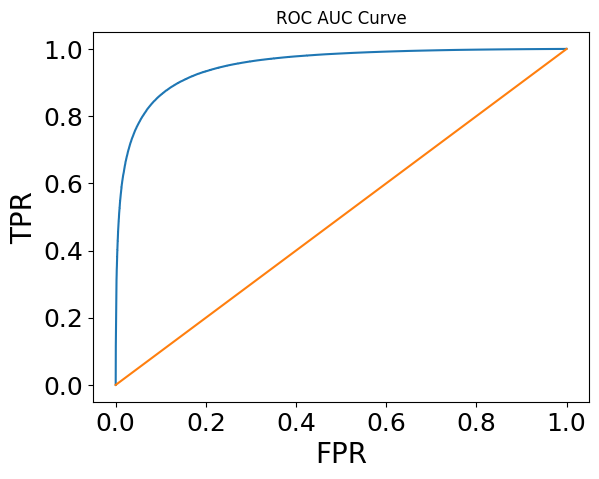

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [19]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.14280803427098035


In [20]:
i = 180000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.86 0.1131
0.9319174958730604 0.09731429372534096 0.8603048048540615


In [21]:
print(sum(predicted),len(predicted))

3015434 3087216


In [22]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.9922471356739475


In [23]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [24]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
centrality_prev, pt_prev, IsTrue0_prev = 0, 0, 0
centrality, pt, IsTrue0 = 0, 0, 0
prob, prob_prev = 0, 0
isTrue_sd, isTrue_sd_prev = 0, 0
puk_loc, puk_prev = 0, 0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = 0, 0, 0, 0
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']

    if ptloc<0.4 or centralityloc<0: continue

    if abs(ptloc -  pt_prev) < 1e-6: 
        cont = 0
        puk_prev = 1
        if proba_loc[counter][1] > prob_prev:
            prob_prev = proba_loc[counter][1]
            IsTrue0_prev = IsTrue0loc
        isTrue_sd_prev = IsTrue0loc
    else: 
        isTrue_sd = isTrue_sd_prev
        isTrue_sd_prev = IsTrue0loc
        pt = pt_prev
        pt_prev = ptloc
        centrality = centrality_prev
        centrality_prev = centralityloc
        prob = prob_prev
        prob_prev = proba_loc[counter][1]
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        cont = 1
        puk = puk_prev
        puk_prev = 0

    if not cont: continue

    if True: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if isTrue_sd: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if prob>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [25]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

387001.1 25996.1 1.0 1.0 0.861 0.095 0.111 0.113


In [26]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

9.049 0.861 0.095 271


In [27]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [28]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(8)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(4)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(2)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(8)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(4)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(2)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    proj.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))
c1.SaveAs("output/kek.png")

0.0 2676.0


Info in <TCanvas::Print>: png file output/kek.png has been created


In [59]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [30]:
import pickle
with open('output/bdt_hit.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


In [31]:
import pickle
# load
with open('output/bdt_hit.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


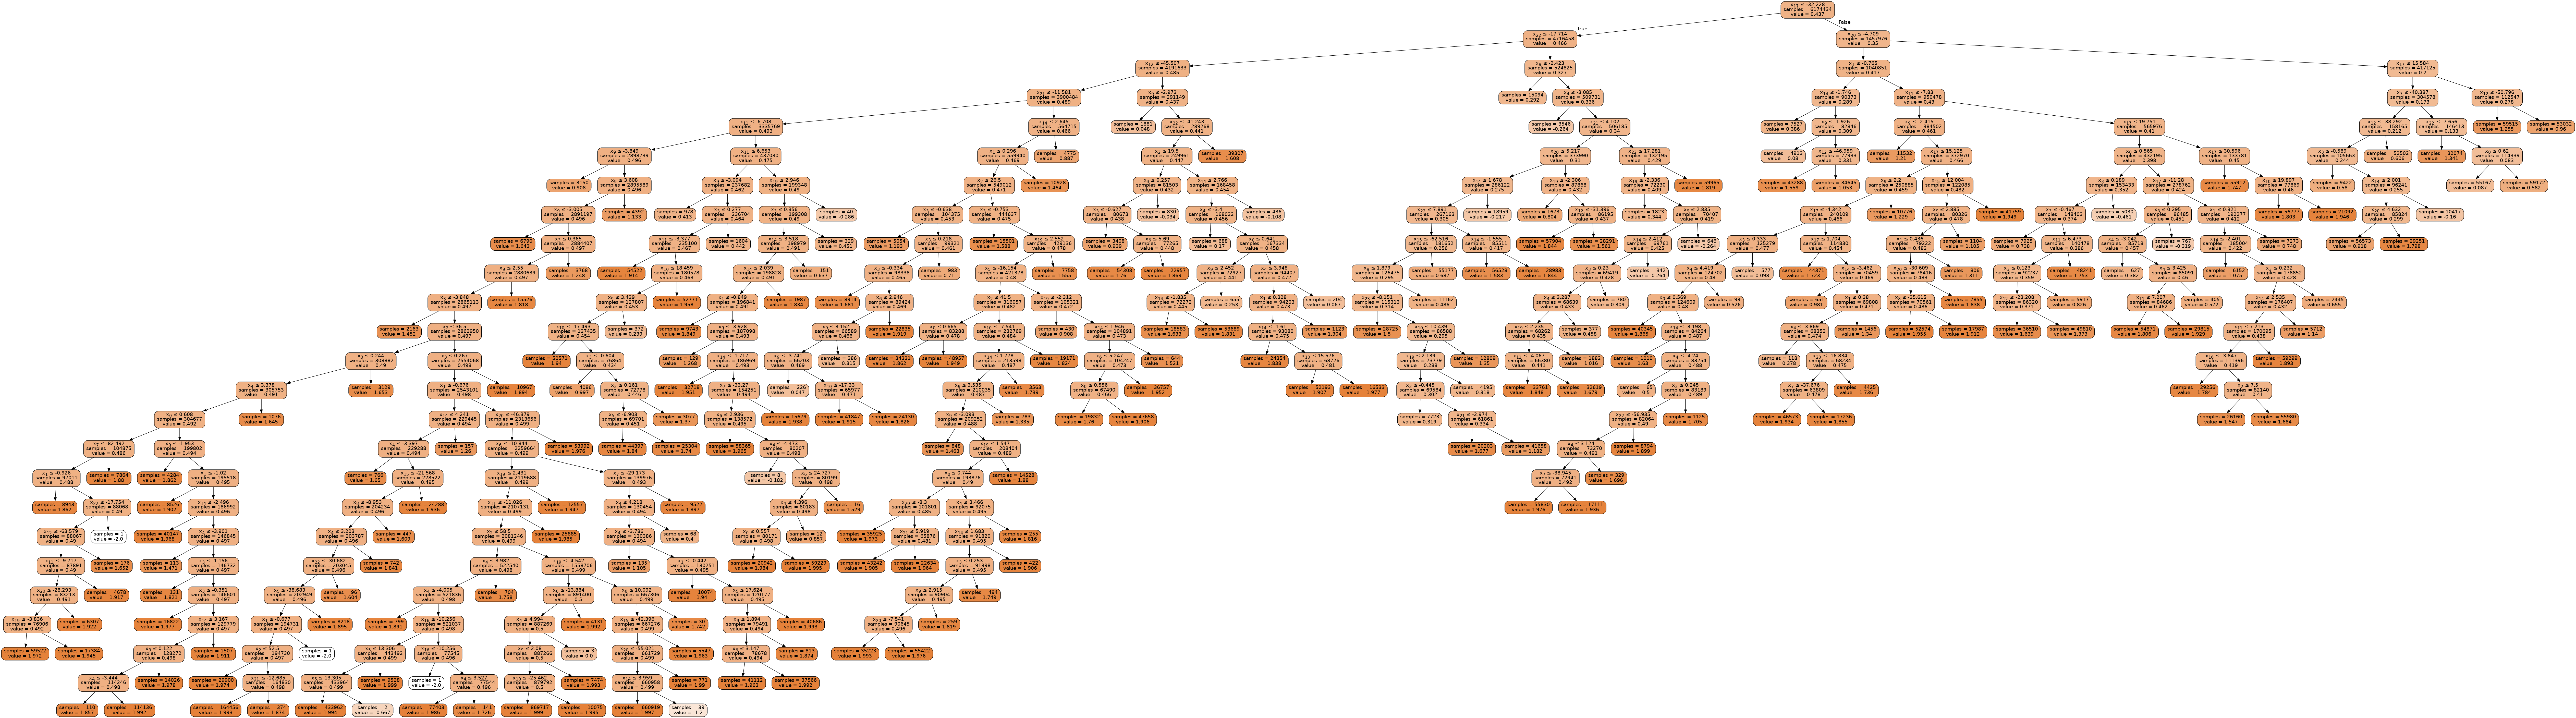

In [32]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [33]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
clf2.predict_proba(kek_data[0:100])

array([[0.00775286, 0.99224714],
       [0.22277578, 0.77722422],
       [0.00724323, 0.99275677],
       [0.01548539, 0.98451461],
       [0.03278808, 0.96721192],
       [0.00664561, 0.99335439],
       [0.01563109, 0.98436891],
       [0.04226991, 0.95773009],
       [0.01391713, 0.98608287],
       [0.00609131, 0.99390869],
       [0.01135508, 0.98864492],
       [0.00541204, 0.99458796],
       [0.01149245, 0.98850755],
       [0.0099054 , 0.9900946 ],
       [0.01977899, 0.98022101],
       [0.40100535, 0.59899465],
       [0.00505611, 0.99494389],
       [0.01927633, 0.98072367],
       [0.30721102, 0.69278898],
       [0.23945848, 0.76054152],
       [0.00502828, 0.99497172],
       [0.01798572, 0.98201428],
       [0.04438764, 0.95561236],
       [0.00649285, 0.99350715],
       [0.00879509, 0.99120491],
       [0.03631496, 0.96368504],
       [0.16580441, 0.83419559],
       [0.0382939 , 0.9617061 ],
       [0.09300726, 0.90699274],
       [0.01184785, 0.98815215],
       [0.

In [35]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 24}


In [36]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.00609131, 0.99390869],
       [0.01135508, 0.98864492],
       [0.00541204, 0.99458796],
       [0.01149245, 0.98850755],
       [0.0099054 , 0.9900946 ],
       [0.01977899, 0.98022101],
       [0.40100535, 0.59899465],
       [0.00505611, 0.99494389],
       [0.01927633, 0.98072367],
       [0.30721102, 0.69278898],
       [0.23945848, 0.76054152]])

In [37]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,1):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[0.39524311 0.38719164 0.39940469 0.39454061 0.39030854 0.38095195
 0.37381207 0.39980686 0.38249203 0.13740134]
[2.98768023 3.13317936 3.33235105 2.99912291 2.44284266 2.65445209
 2.61386219 3.33235105 2.68298086 1.79962711 1.97107595]
[0.59754423 0.59560646 0.59854462 0.59737528 0.59635697 0.59410268
 0.59237979 0.59864125 0.59447401 0.5342964 ]


In [38]:
best_gbc = clf2.best_estimator_

In [39]:
n_estim = best_gbc.n_estimators

In [40]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[5.09478139 4.46666999 5.21370188 4.45450608 4.60472036 3.90315757
 0.4012779  5.28208899 3.92941277 0.81319058]
[0.99390869 0.98864492 0.99458796 0.98850755 0.9900946  0.98022101
 0.59899465 0.99494389 0.98072367 0.69278898]
0.2


In [41]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [42]:
print(log_odds_predictions)

[[1.9762155374586818, 1.935958176768502, 1.9970234359048045, 1.9727030625832225, 1.9515426840810146, 1.904759728537806, 1.8690603710527443, 1.9990342851755876, 1.9124601341691412, 0.6870067110027117], [1.604037940960137, 1.329637035344919, 1.6686016830141153, 1.6716549517767023, 1.6381383610360487, 1.604037940960137, 0.9621693215313919, 1.6691118418923276, 1.645995334438134, 0.006280412642197549], [1.392886049115021, 1.4770389808628086, 1.4728314962539792, 1.4770389808628086, 1.2380545762917896, 1.3117588282214272, 1.27711019050773, 1.4770389808628086, 1.4442923166509207, 0.3657107914626278], [1.35380155655589, 1.3476816687459912, 1.35380155655589, 1.2812281483382897, 1.339095568503512, 1.346589131308556, 0.4430894423561637, 1.35380155655589, 1.1736458538535477, 0.5780061883541383], [1.2641954806334597, 1.2589219064189325, 1.2705539540807553, 1.2675093483996862, 0.8104764288347691, 0.6772006141127033, 0.6222890986220694, 1.2694905008955104, 1.2389202421425018, 0.4166397860042906], [1.1

In [43]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(n_estim)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 5.09478138876174
[5.09478139 4.46666999 5.21370188 4.45450608 4.60472036 3.90315757
 0.4012779  5.28208899 3.92941277 0.81319058]


In [44]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

24
1
[[1.9762155374586818, 1.604037940960137, 1.392886049115021, 1.35380155655589, 1.2641954806334597, 1.1494356386899314, 1.1580386774179576, 1.1143023827527279, 1.0797436946622823, 1.0654040674081873, 1.0437143375896367, 1.0086064981132619, 0.7364155509100714, 0.8874103677502599, 0.7382235244846107, 0.965284433293592, 0.9441364162010129, 0.9044426504958527, 0.8936677482641051, 0.6883778292854514, 0.9264695352267467, 0.7968842767574296, 0.9094388610384274, 0.8727738887439714], [1.935958176768502, 1.329637035344919, 1.4770389808628086, 1.3476816687459912, 1.2589219064189325, 1.1785666406480138, 1.1375428454339456, 0.9377782410713671, 1.0797436946622823, 0.9687701056316778, 1.0000069322679903, 0.9541027079249568, 1.0020875356705259, 1.0116392956305456, 0.9504406881144485, 0.7848710635729603, 0.403427735369989, 0.737761973436042, -0.3329657667285669, 0.8000498402544703, 0.6388518960211433, 0.4242253624856347, 0.6623893224829053, 0.64482206026117], [1.9970234359048045, 1.6686016830141153,

In [45]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [46]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [47]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Ecore', 'Centrality', 'reconpt', 'sdthe0', 'SecondHitPhiR0', 'SecondHitTheR0', 'SecondHitPhiR01', 'SecondHitTheR01', 'sdthe1', 'SecondHitPhiR1', 'SecondHitTheR1', 'SecondHitPhiR11', 'SecondHitTheR11', 'sdthe2', 'SecondHitPhiR2', 'SecondHitTheR2', 'SecondHitPhiR21', 'SecondHitTheR21', 'sdthe3', 'SecondHitPhiR3', 'SecondHitTheR3', 'SecondHitPhiR31', 'SecondHitTheR31']
24


In [48]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[17] <= -32.22763442993164) if (x[22] <= -17.713576316833496) if (x[12] <= -45.50703811645508) if (x[21] <= -11.580770015716553) if (x[11] <= -6.708314657211304) if (x[9] > -3.8487298488616943) if (x[9] <= 3.607889175415039) if (x[9] > -3.0046229362487793) if (x[3] <= 0.36526380479335785) if (x[9] <= 2.5501372814178467) if (x[3] > -3.8477492332458496) if (x[2] > 36.5) if (x[3] <= 0.26706601679325104) if (x[1] > -0.6764968633651733) if (x[20] <= -46.37874412536621) if (x[6] <= -10.843790531158447) if (x[19] <= 2.431262254714966) if (x[11] <= -11.025793075561523) if (x[2] > 58.5) if (x[19] <= -4.5418806076049805) if (x[6] <= -13.884059429168701) if (x[4] <= 4.994034767150879) if (x[9] <= 2.0797582864761353) if (x[10] <= -25.461578369140625)   return 1.9990342851755878;  // | based on 869,717 samples
        if  (x[17] <= -32.22763442993164) if (x[22] <= -17.713576316833496) if (x[12] <= -45.50703811645508) if (x[21] <= -11.580770015716553) if (x

In [49]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [50]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[17] <= -32.22763442993164) and (x[22] <= -17.713576316833496) and (x[12] <= -45.50703811645508) and (x[21] <= -11.580770015716553) and (x[11] <= -6.708314657211304) and (x[9] > -3.8487298488616943) and (x[9] <= 3.607889175415039) and (x[9] > -3.0046229362487793) and (x[3] <= 0.36526380479335785) and (x[9] <= 2.5501372814178467) and (x[3] > -3.8477492332458496) and (x[2] > 36.5) and (x[3] <= 0.26706601679325104) and (x[1] > -0.6764968633651733) and (x[20] <= -46.37874412536621) and (x[6] <= -10.843790531158447) and (x[19] <= 2.431262254714966) and (x[11] <= -11.025793075561523) and (x[2] > 58.5) and (x[19] <= -4.5418806076049805) and (x[6] <= -13.884059429168701) and (x[4] <= 4.994034767150879) and (x[9] <= 2.0797582864761353) and (x[10] <= -25.461578369140625) :  return 1.9990342851755878  # | based on 869,717 samples
        if (x[17] <= -32.22763442993164) and (x[22] <= -17.713576316833496) and (x[12] <= -45.50703811645508)

        if (x[4] > -2.1558279991149902) and (x[2] > 6.5) and (x[4] <= 2.2750712633132935) and (x[14] <= 1.3255102038383484) and (x[22] <= 0.000190225058759097) and (x[0] > 0.6636388301849365) and (x[5] <= 5.380738973617554) and (x[22] <= -1.3375270668802841e-06) and (x[22] <= -0.28110378980636597) and (x[14] > -1.2803013920783997) and (x[0] <= 3.302140712738037) and (x[21] <= -15.8119535446167) and (x[5] <= -57.94422721862793) and (x[9] > -3.8378326892852783) and (x[3] <= 0.30229325592517853) and (x[9] <= 3.9085633754730225) and (x[17] <= 1.7007752656936646) and (x[17] <= -0.12287913262844086) and (x[3] <= 0.30228008329868317) and (x[15] <= 2.393032670021057) and (x[17] <= -6.461016654968262) and (x[5] <= -57.94506645202637) and (x[13] <= -61.61129379272461) and (x[1] > -19.799549102783203) :  return 0.8727738887439714  # | based on 871,041 samples
        if (x[4] > -2.1558279991149902) and (x[2] > 6.5) and (x[4] <= 2.2750712633132935) and (x[14] <= 1.3255102038383484) and (x[22] <= 0

In [51]:
def mytree(x,y):
    return 0

In [52]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [53]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [54]:
iestim = 0
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(n_estim)]
print(myf)

[1.97621554 1.93595818 1.99702344 1.97270306 1.95154268 1.90475973
 1.86906037 1.99903429 1.91246013 0.68700671]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[0.7418845295906067, 0.13259784790024268, 72.0, 0.11453481763601303, 0.11378060281276703, -99.0, -99.0, -99.0, -99.0, 1.011328101158142, -99.0, -99.0, -99.0, -99.0, 0.04948626831173897, -99.0, -99.0, -99.0, -99.0, 0.5322844386100769, -4.528041839599609, -19.282764434814453, -99.0, -99.0]


In [56]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.99390868523421, 0.9886449196803242, 0.9945879569741751, 0.9885075510538182, 0.9900945992630387, 0.9802210053921161, 0.5989946515734064, 0.9949438903017583, 0.9807236689754228, 0.692788980689129]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [57]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [58]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Ecore', 'Centrality', 'reconpt', 'sdthe0', 'SecondHitPhiR0', 'SecondHitTheR0', 'SecondHitPhiR01', 'SecondHitTheR01', 'sdthe1', 'SecondHitPhiR1', 'SecondHitTheR1', 'SecondHitPhiR11', 'SecondHitTheR11', 'sdthe2', 'SecondHitPhiR2', 'SecondHitTheR2', 'SecondHitPhiR21', 'SecondHitTheR21', 'sdthe3', 'SecondHitPhiR3', 'SecondHitTheR3', 'SecondHitPhiR31', 'SecondHitTheR31']
24
